In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(r"D:\archive (3)\seattle-weather.csv")

In [5]:
#understanding dataset

In [6]:
data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
data.shape

(1461, 6)

In [10]:
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [11]:
#Cleaning the data

In [12]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [13]:
data['date'] = pd.to_datetime(data['date'])

In [14]:
data.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [15]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [16]:
data.duplicated().sum()


0

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [19]:
outliers_summary = {}
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    outliers_summary[col] = detect_outliers(data, col)

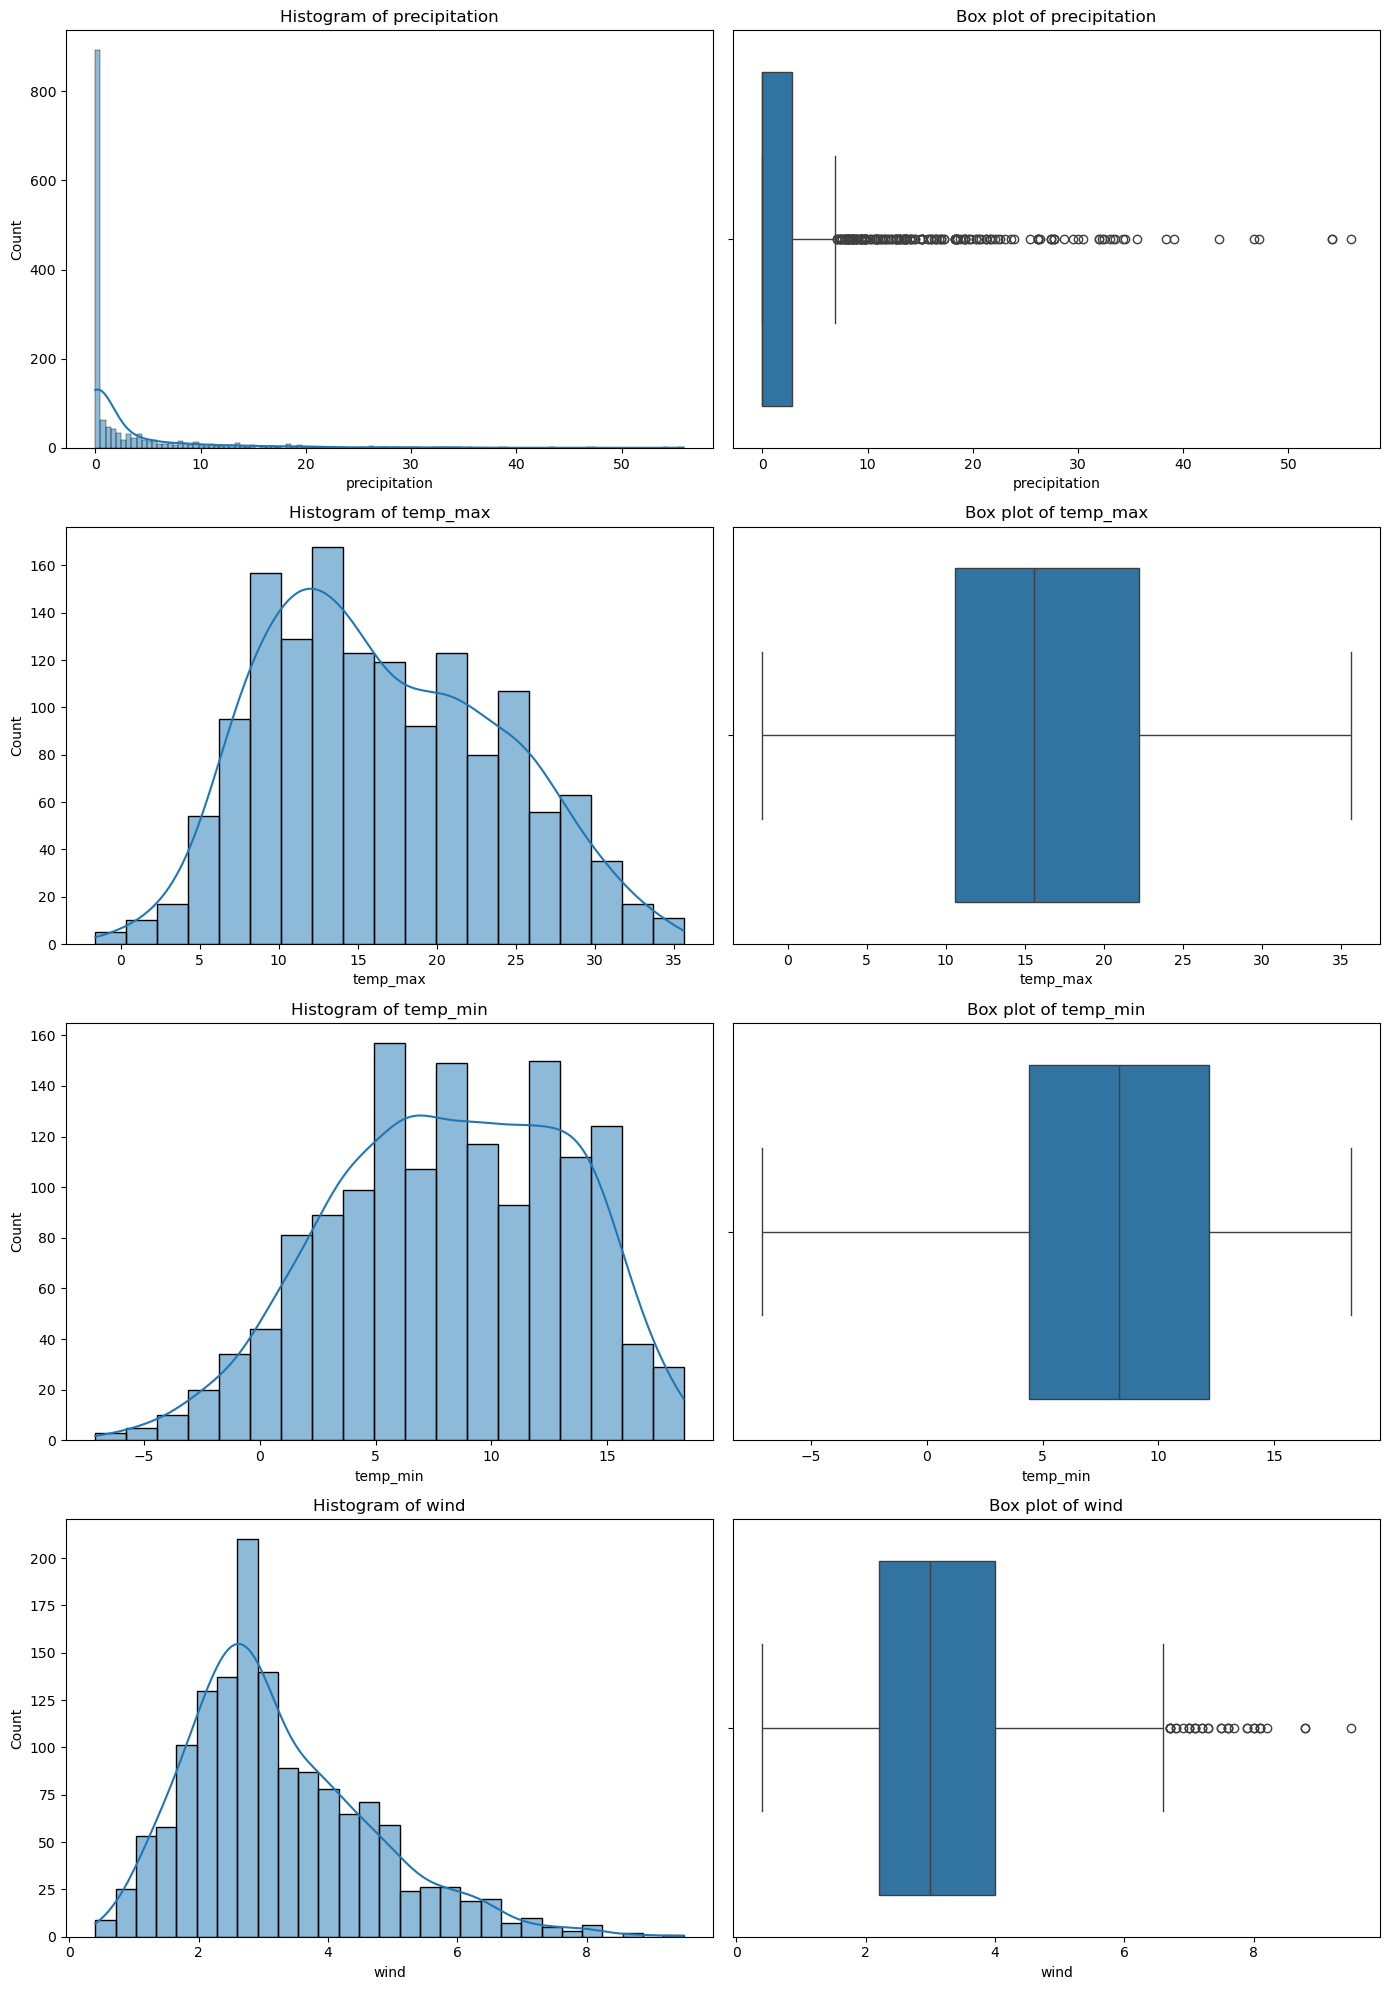

In [20]:
num_columns = data.select_dtypes(include=['float64', 'int64']).columns
fig, axs = plt.subplots(len(num_columns), 2, figsize=(14, 20))

for i, col in enumerate(num_columns):
    # Histogram
    sns.histplot(data[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {col}')
    
    # Box plot
    sns.boxplot(x=data[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [21]:
#Visualization 

C:\Users\kaviy\AppData\Local\Temp\ipykernel_2244\758220560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")


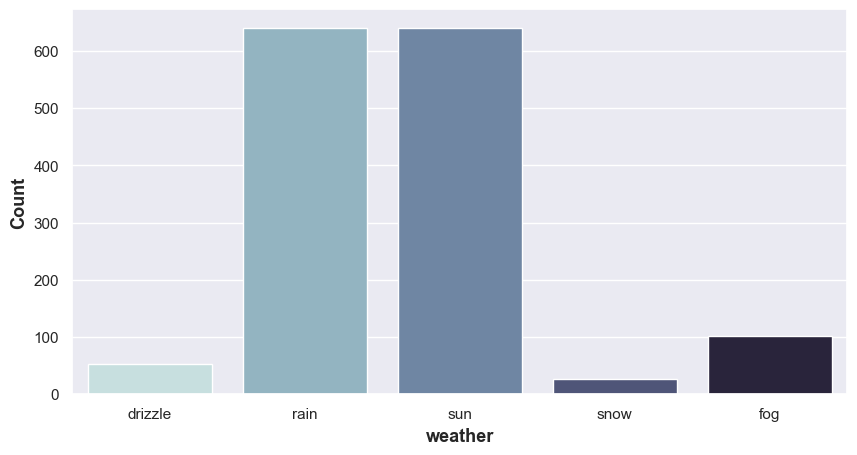

In [22]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

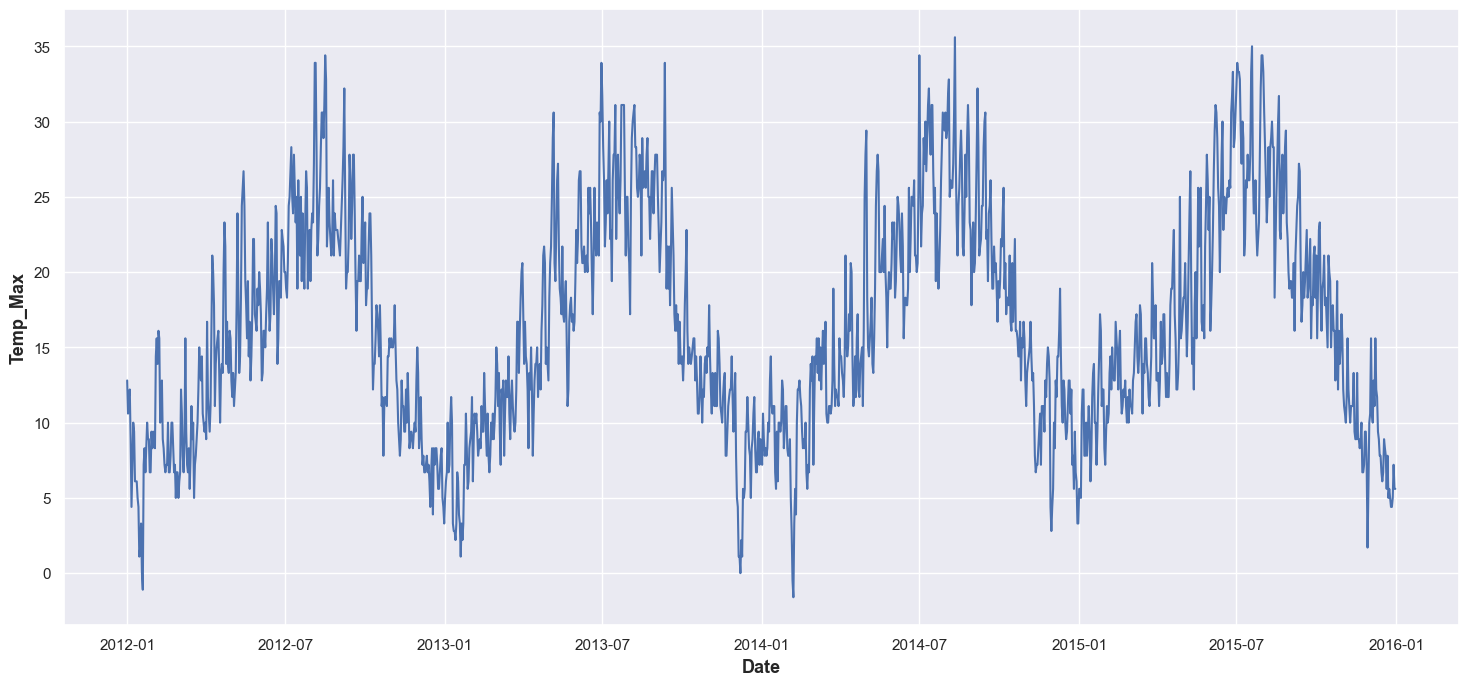

In [23]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

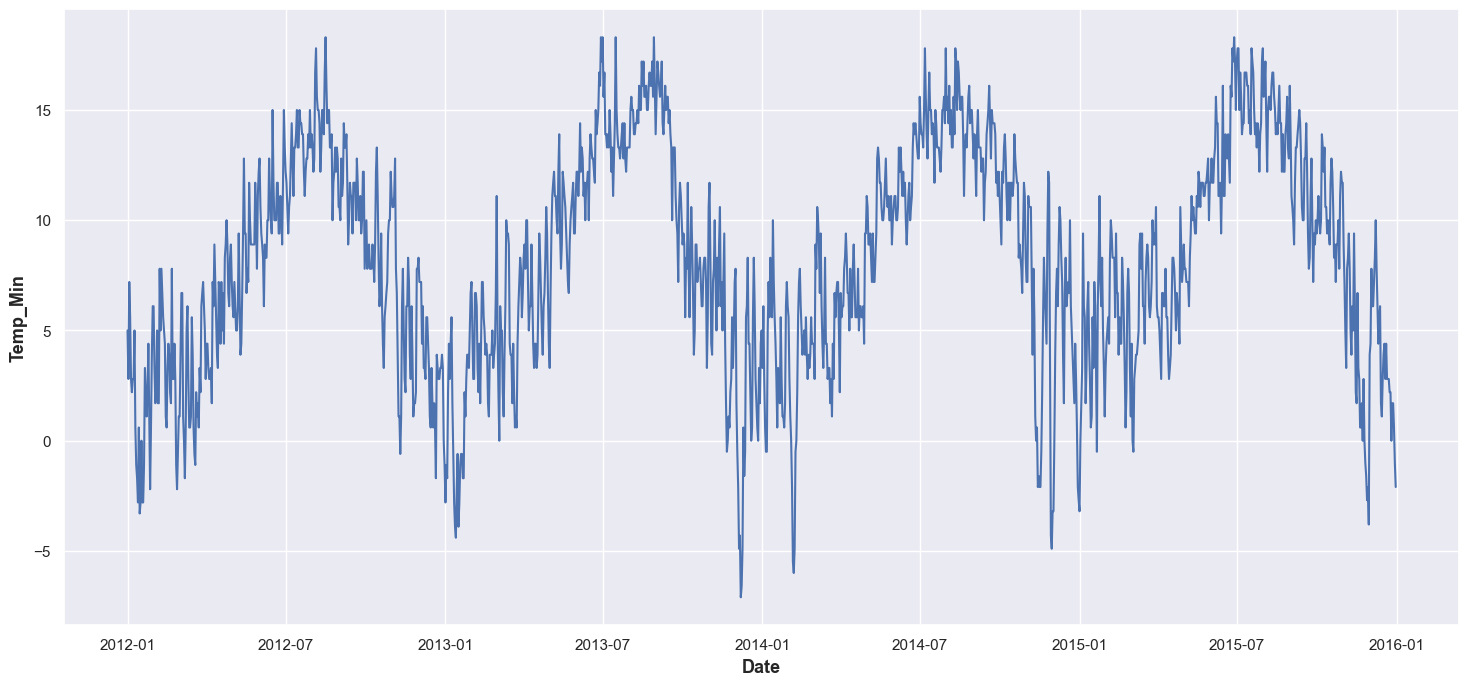

In [24]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

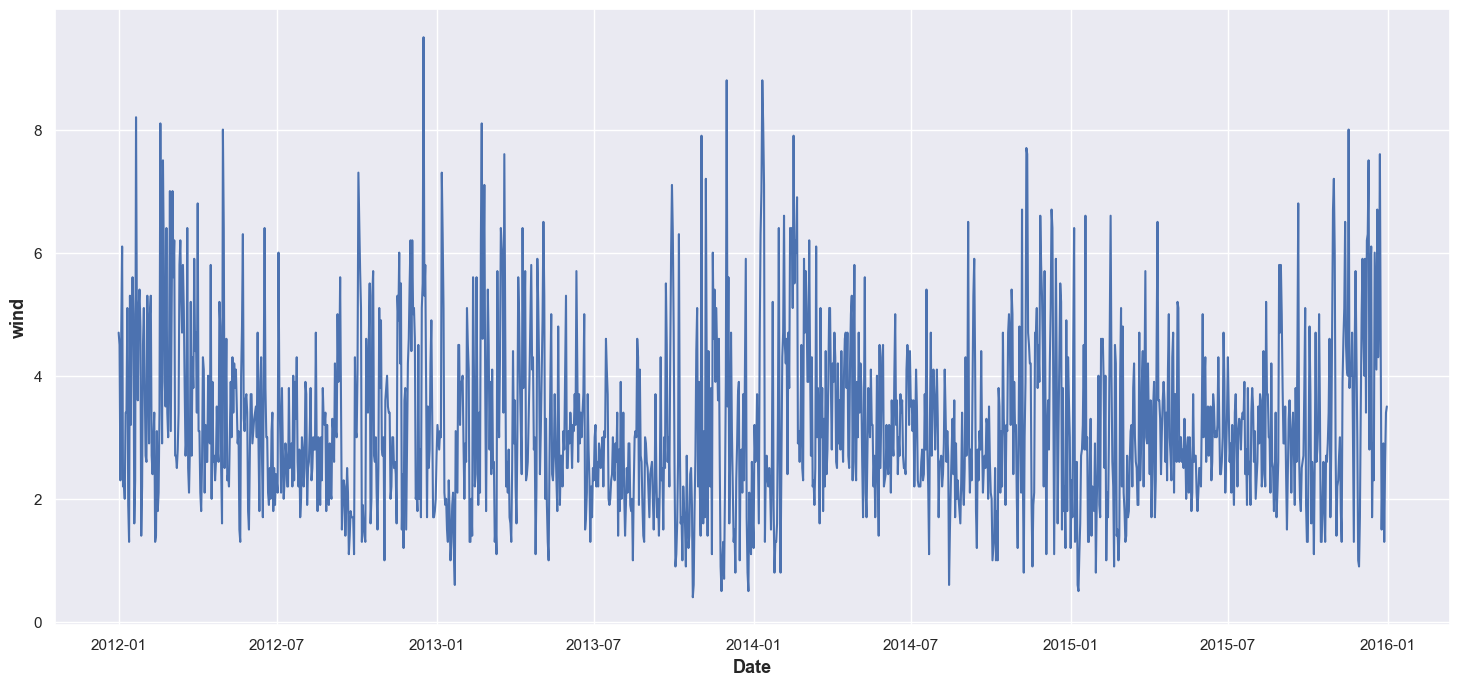

In [25]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

<Figure size 1400x800 with 0 Axes>

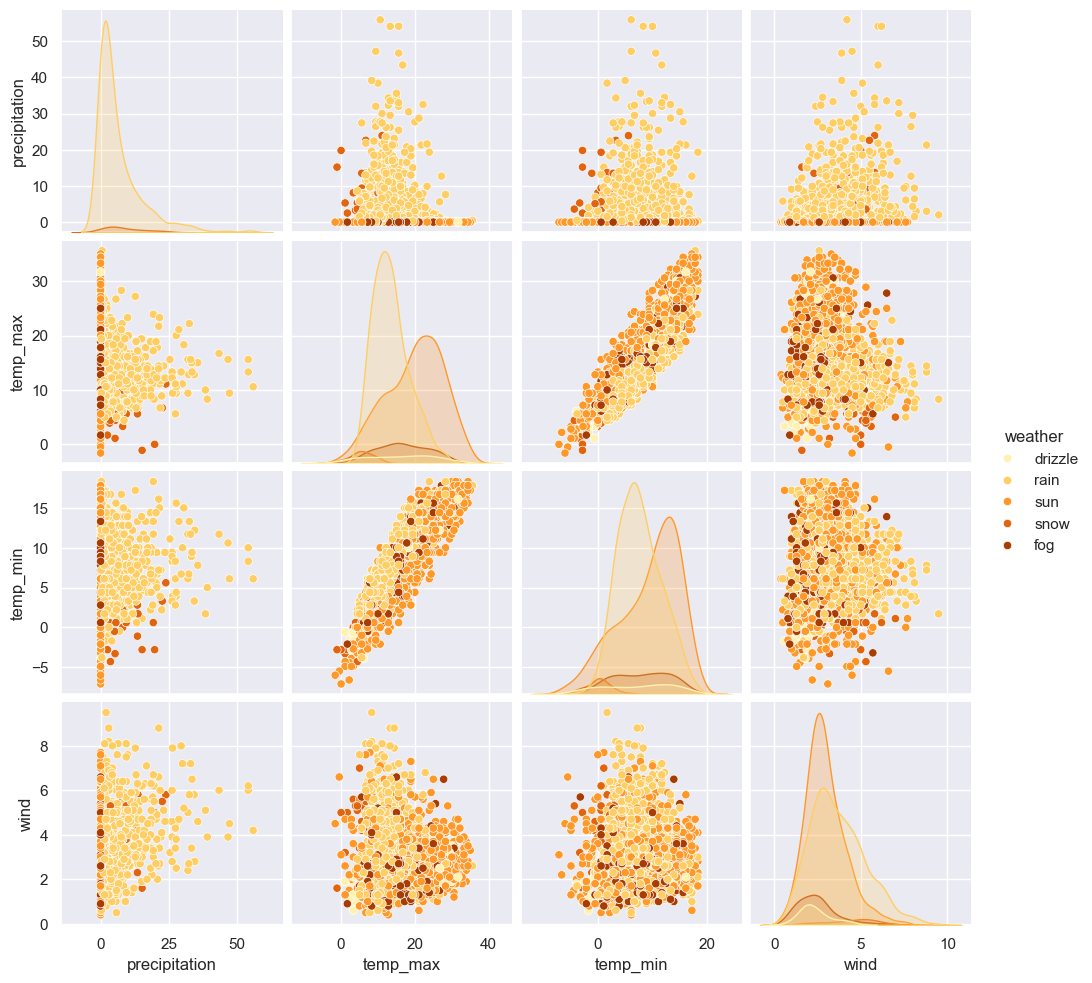

In [26]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

C:\Users\kaviy\AppData\Local\Temp\ipykernel_2244\3814060822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")


<Figure size 1000x500 with 0 Axes>

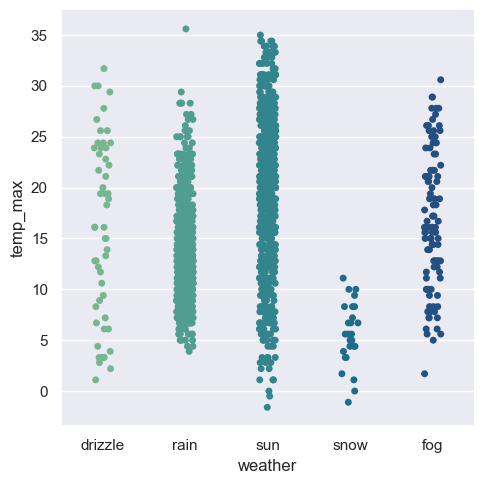

In [27]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")
plt.show()

C:\Users\kaviy\AppData\Local\Temp\ipykernel_2244\1093999663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")


<Figure size 1000x500 with 0 Axes>

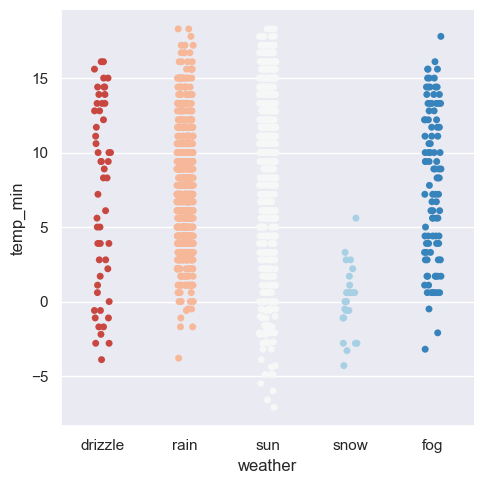

In [28]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")
plt.show()

C:\Users\kaviy\AppData\Local\Temp\ipykernel_2244\1991129908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='wind',data=data,palette = "magma")


<Figure size 1000x500 with 0 Axes>

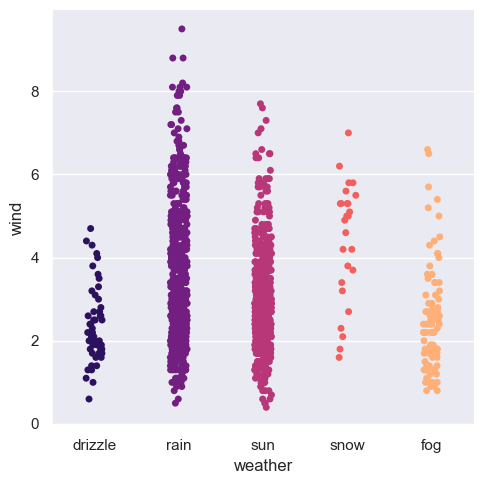

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=data,palette = "magma")
plt.show()

C:\Users\kaviy\AppData\Local\Temp\ipykernel_2244\1492132081.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")


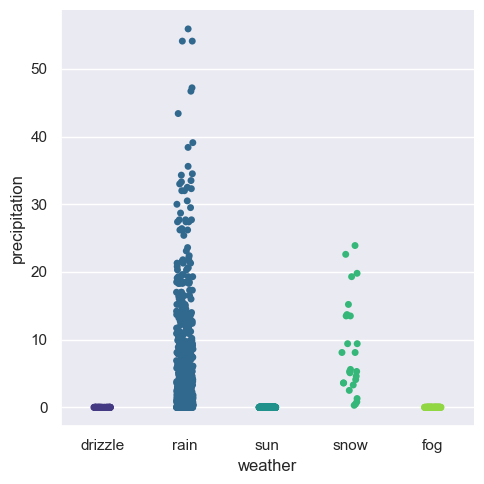

In [30]:
sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")
plt.show()

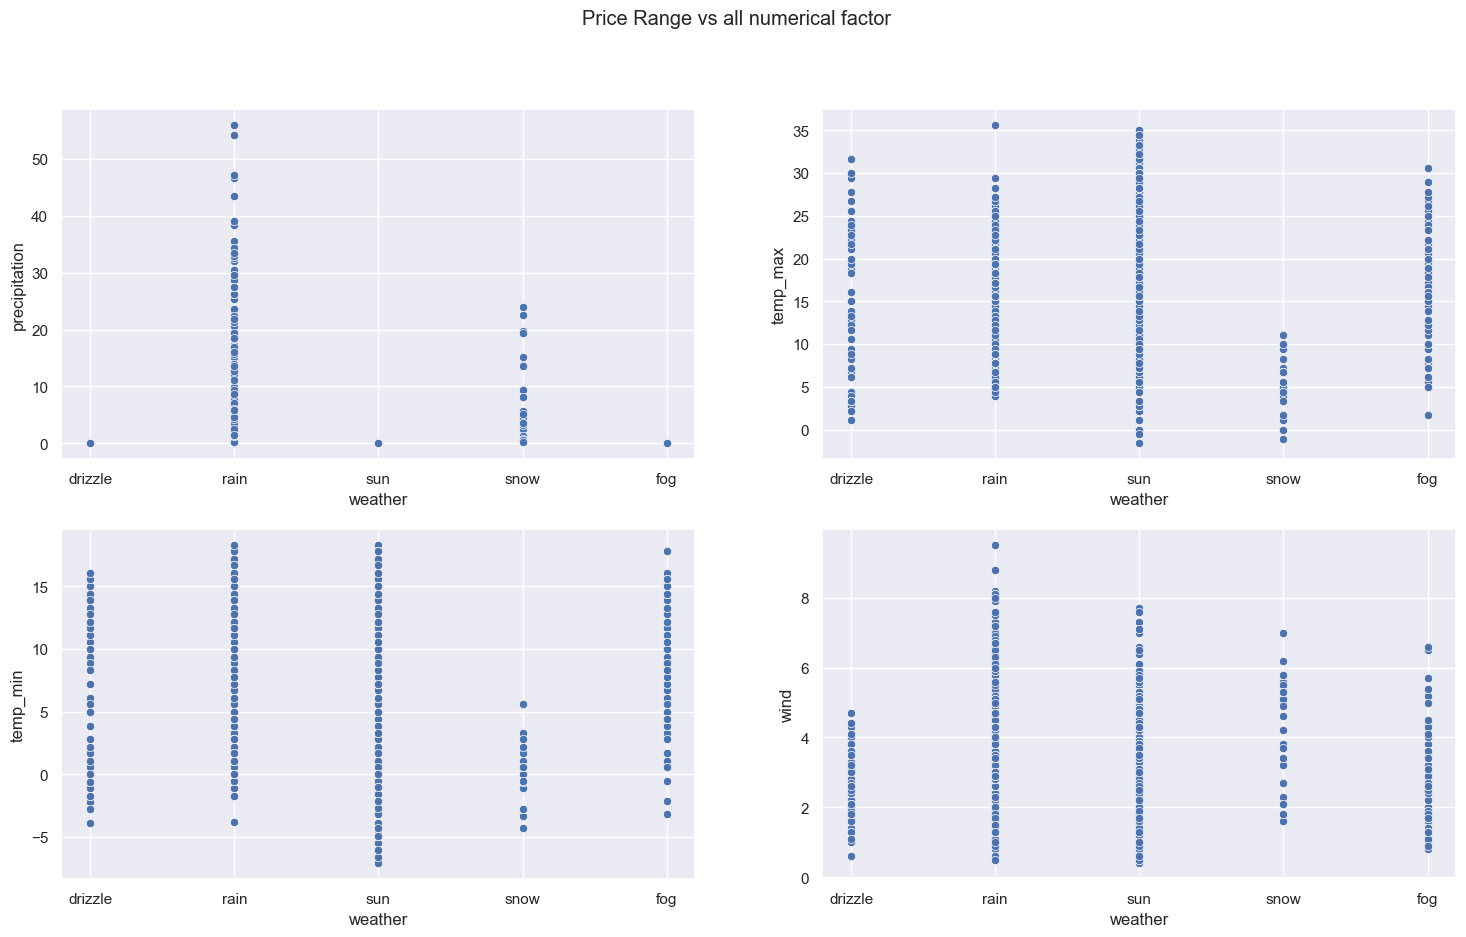

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=data, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=data, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=data, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=data, x='weather', y='wind')
plt.show()

In [32]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [33]:
data = data.drop('date',axis=1)

In [34]:
x = data.drop('weather',axis=1)
y = data['weather']

In [35]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [36]:
# Splitting train and test data 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


In [39]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [40]:
#feature scalling

In [41]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [42]:
#logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
y_pred

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 130   0  25]
 [  0   0   6   0   0]
 [  0   0  14   0 149]]


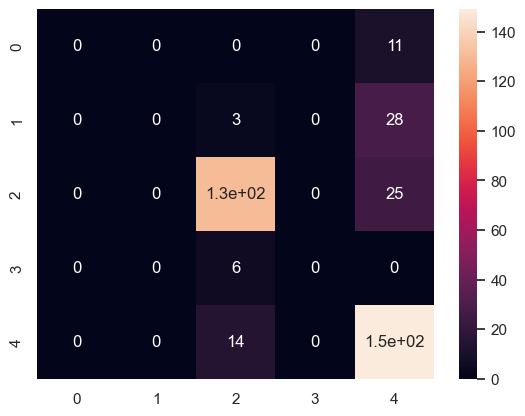

In [47]:
sns.heatmap(cm,annot=True)
plt.show()

In [48]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7622950819672131


In [49]:
#SVM

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 126   0  29]
 [  0   0   4   2   0]
 [  0   0   0   0 163]]


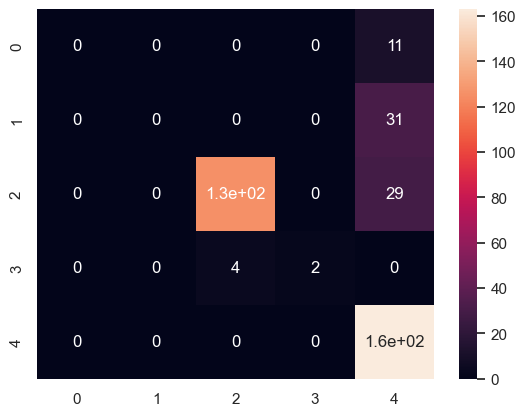

In [53]:
sns.heatmap(cm,annot=True)
plt.show()

In [54]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.7950819672131147


In [55]:
#Naive bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 141   2  12]
 [  0   0   2   4   0]
 [  0   0   0   0 163]]


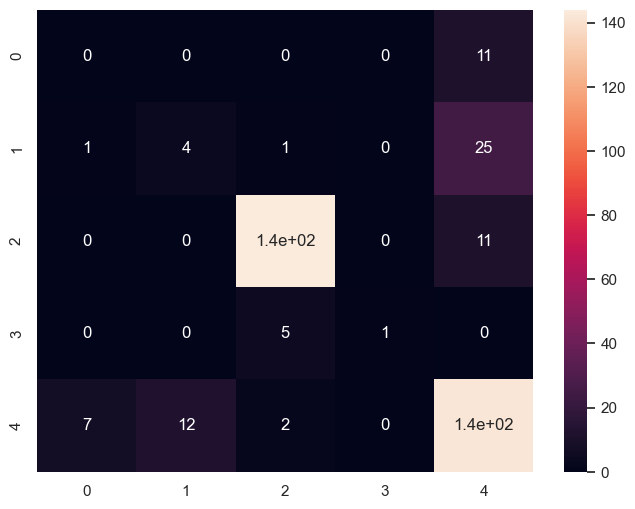

In [154]:
sns.heatmap(cm,annot=True)
plt.show()

In [59]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc3}")

Accuracy score : 0.8415300546448088


In [60]:
#Decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
y_pred

array([4, 0, 2, 4, 4, 2, 2, 2, 4, 2, 0, 2, 4, 1, 0, 4, 1, 2, 2, 2, 2, 2,
       2, 4, 4, 0, 4, 2, 0, 4, 2, 4, 3, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2, 2,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 3, 4, 2, 4, 4, 4, 1, 1, 2,
       4, 1, 4, 2, 2, 3, 2, 0, 1, 4, 2, 0, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 1, 2, 1, 2, 3, 4, 0, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 2, 4, 4, 0, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 1, 4, 2,
       1, 2, 0, 4, 2, 4, 4, 0, 2, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 1, 2, 1, 4, 2, 2, 4, 4, 4, 1, 4, 2, 2, 4, 0,
       2, 4, 2, 2, 1, 4, 2, 2, 2, 4, 1, 1, 3, 2, 2, 2, 1, 4, 1, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 2, 4, 2, 0, 0, 2, 2, 2, 2, 1, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 0, 2, 4, 0, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4,
       1, 2, 4, 2, 4, 1, 4, 4, 2, 2, 0, 1, 2, 4, 2, 4, 2, 2, 2, 0, 0, 4,
       2, 4, 2, 2, 1, 2, 4, 2, 1, 2, 2, 4, 2, 4, 2,

In [64]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   2   1   0   7]
 [  6   8   1   0  16]
 [  0   1 140   4  10]
 [  0   0   3   3   0]
 [ 18  23   9   0 113]]


<Axes: >

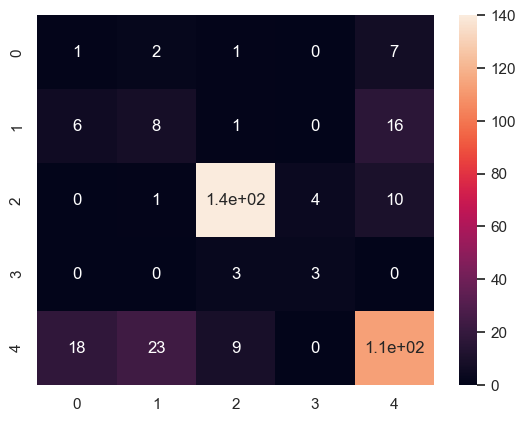

In [65]:
sns.heatmap(cm,annot=True)

In [66]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc4}")

Accuracy score: 0.7240437158469946


In [67]:
#knn 

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   1   3   0   6]
 [  1   4   5   0  21]
 [  0   3 127   0  25]
 [  0   0   3   1   2]
 [  5  17  26   0 115]]


In [71]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.6775956284153005


In [72]:
#RF

In [158]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)
RandomForestClassifier(n_estimators=40, random_state=0)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

<Axes: >

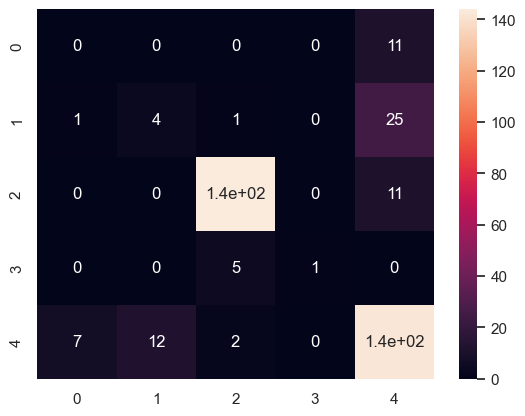

In [74]:
sns.heatmap(cm,annot=True)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.25      0.13      0.17        31
           2       0.95      0.93      0.94       155
           3       1.00      0.17      0.29         6
           4       0.75      0.87      0.81       163

    accuracy                           0.80       366
   macro avg       0.59      0.42      0.44       366
weighted avg       0.77      0.80      0.78       366



In [76]:
acc6 = forest.score(X_test,y_test)
print(acc6)

0.7950819672131147


C:\Users\kaviy\AppData\Local\Temp\ipykernel_2244\1160788662.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)


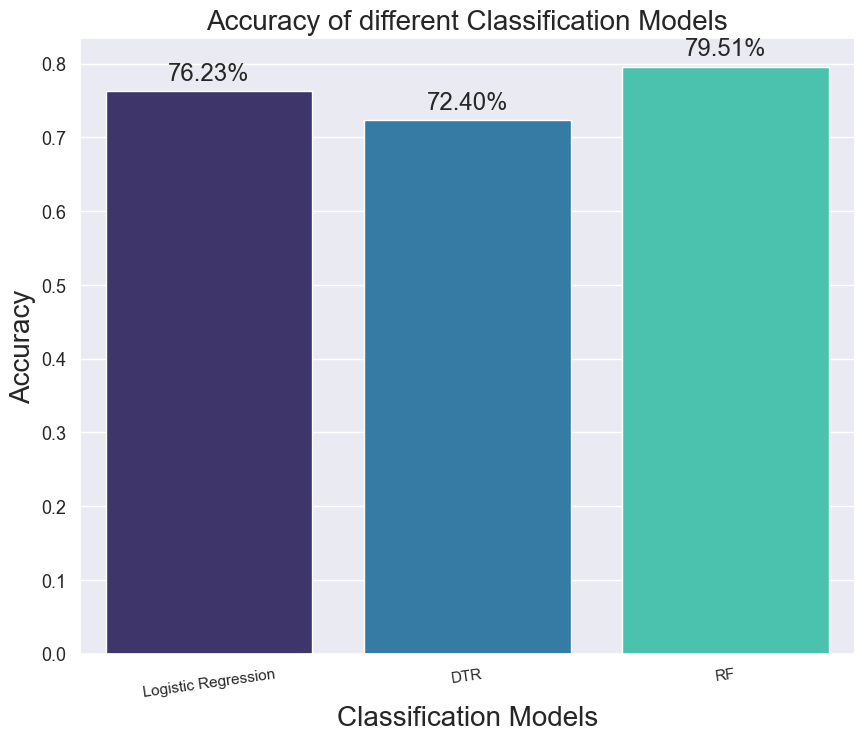

In [186]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")


mylist.append(acc4)
mylist2.append("DTR")

mylist.append(acc6)
mylist2.append("RF")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()